## Problem Statement

Predict the height of the patients which is a key symptom in finding a specific disease.

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
df = pd.read_csv("df.csv")

In [3]:
df.head()

,Unnamed: 0,height,face,torso,left_shin,left_shin2,right_shin,shoulder,left_arm,right_arm,var1,var2,var3,var4
0,2b8cfe,718.364242,70.590966,269.515232,141.239887,207.537653,132.184916,173.261397,131.966158,133.629282,3.521170,0.465162,2.604957,10
1,2b8d62,716.408785,70.291010,269.095971,140.472361,207.911571,131.975686,173.246057,131.834962,133.321101,3.695440,0.466050,2.651357,10
2,2b8dc6,714.962277,70.080707,268.745611,139.719235,208.382592,131.713437,173.365407,131.959255,133.123379,3.842206,0.461098,2.697869,10
3,2b8e2a,714.013129,69.785521,268.532332,138.903499,208.878420,131.519061,173.468325,132.536927,132.971018,3.931842,0.464465,2.597504,10
4,2b8e8e,713.687593,69.647635,268.520798,138.292113,209.162872,131.501779,173.625843,132.877215,132.917984,3.981150,0.459436,2.497521,10


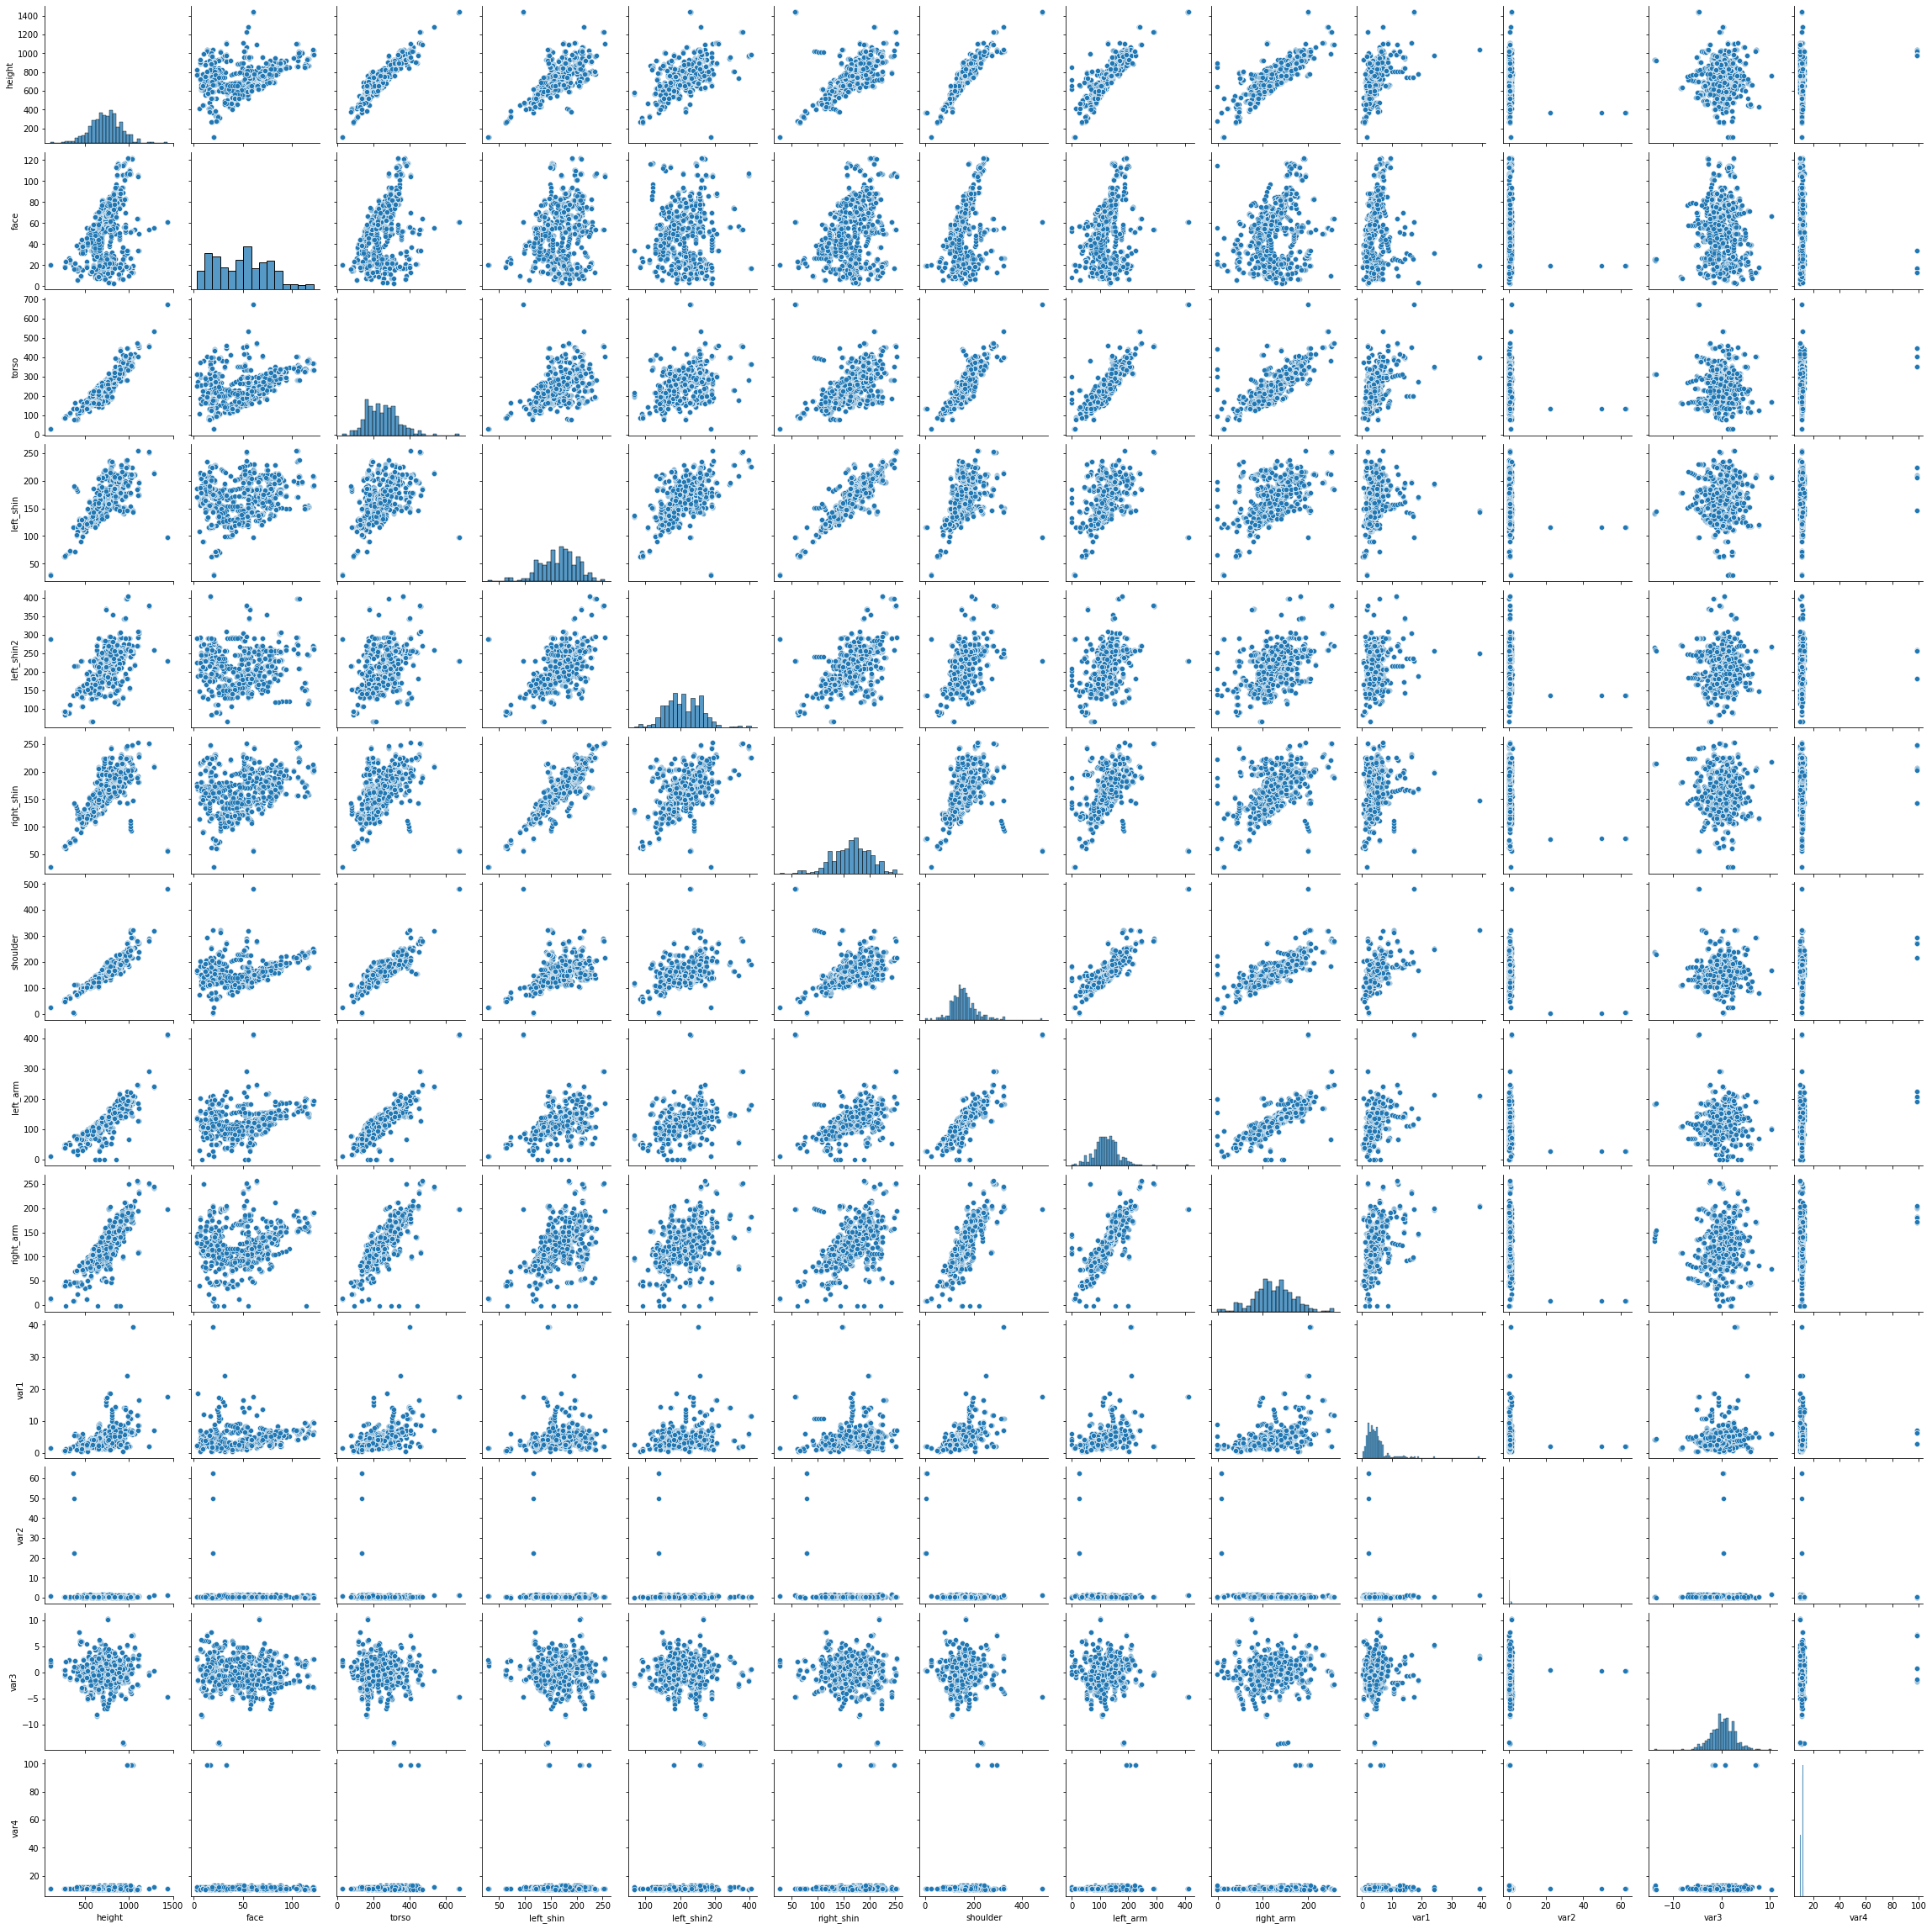

In [5]:
sns.pairplot(df)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,1475.0,736.490845,176.959125,109.675758,620.395227,742.420174,845.007426,1439.150017
face,1425.0,49.743961,27.514774,3.084728,23.891749,50.517693,69.414903,121.884848
torso,1475.0,251.350123,87.017097,28.810246,183.835898,250.059006,305.894377,674.834122
left_shin,1475.0,166.085670,35.351708,29.425556,143.528854,170.019236,190.179903,254.593916
left_shin2,1470.0,211.104564,52.673392,66.954828,175.190643,209.447995,248.631672,403.353891
right_shin,1475.0,164.318308,36.662495,26.965597,141.515665,167.068308,189.716856,252.385258
shoulder,1475.0,158.388722,50.034481,1.913001,128.609104,153.533341,180.354901,482.735492
left_arm,1475.0,123.490944,46.060624,-1.000000,95.832277,122.203820,148.028597,412.144406
right_arm,1475.0,124.180951,43.940488,-1.000000,97.348004,123.985295,151.154657,256.857427
var1,1435.0,4.708036,3.709961,0.360236,2.584477,4.064704,5.614410,39.359172


We can see that their are some negative values in some of the features and we know that these are height of the features which can never be negative. We can also see that their is difference in minimum and maximum values so we have to apply some scaler to bring all the features to the range but before we have to remove outliers if their is any.

In [7]:
df.shape

(1475, 14)

In [8]:
df.dtypes

Unnamed: 0     object
height        float64
face          float64
torso         float64
left_shin     float64
left_shin2    float64
right_shin    float64
shoulder      float64
left_arm      float64
right_arm     float64
var1          float64
var2          float64
var3          float64
var4            int64
dtype: object

### In Preprocessing of this data set we should consider following things

1) Scaling of features since we can see that their is big difference in range of values of different features    
2) Transformation of the data to make it linear    
3) Missing values imputation

In [9]:
# Checking Null Values in our data set
df.isnull().sum()

Unnamed: 0     0
height         0
face          50
torso          0
left_shin      0
left_shin2     5
right_shin     0
shoulder       0
left_arm       0
right_arm      0
var1          40
var2           0
var3           0
var4           0
dtype: int64

we can see that face, left_shin2 and var1 is having some null values we will perform mean imputation for these values but before performing the mean imputation we have to remove any negative values in the data set.       
Features having negative values are: left_arm,right_arm and var3   
since we don't have much information on var3 and this feature having more negative values so we will retain it as it is.

In [13]:
# calculating total number of rows with negative value
df.query('left_arm <0 or right_arm<0')

,Unnamed: 0,height,face,torso,left_shin,left_shin2,right_shin,shoulder,left_arm,right_arm,var1,var2,var3,var4
198,2c2682,618.296152,NaN,219.272060,132.428492,176.377559,133.310642,132.471912,-1.000000,109.496965,NaN,0.346495,1.028406,11
302,2c7826,617.107549,52.461682,216.009138,124.715538,163.075436,139.510387,128.606062,-1.000000,105.235004,4.334734,0.434464,0.171468,12
510,2d1b6e,279.672618,23.597152,94.051391,66.106444,91.504336,61.001102,57.685749,49.284171,-1.000000,1.151929,0.432808,2.116985,11
590,2d59ee,658.771896,55.267924,166.637639,169.072821,203.418194,171.113964,138.200975,-1.000000,118.090349,3.926442,0.521411,3.330239,12
652,2d8996,645.476135,30.497614,233.639149,131.311896,139.449028,143.718859,150.836485,77.505774,-1.000000,2.364220,0.302400,2.048539,10
696,2dac5a,881.051311,114.755212,340.514904,154.462583,152.010015,175.648732,221.489079,199.399506,-1.000000,5.070410,0.513716,1.851538,12
871,2e3512,718.009489,8.232946,183.923275,159.263430,190.818820,143.851204,179.520746,-1.000000,141.935562,6.047439,0.376913,3.992794,12
927,2e606e,850.683379,55.264599,297.699272,183.641718,209.694647,188.939146,185.354600,-1.000000,145.496407,2.493547,0.165249,-0.422838,10
929,2e6136,850.968044,55.264599,298.116295,183.724365,209.998978,188.598476,185.498100,154.949386,-1.000000,2.493547,0.157300,-0.423176,10
1185,2f2ac6,900.757032,21.058700,441.519964,197.242992,253.249179,222.178871,154.205175,199.405984,-1.000000,8.776878,0.316562,1.894811,13


In [14]:
# Removing all negative rows

df = df[df['left_arm']>0]
df = df[df['right_arm']>0]

# Removed 10 rows

In [15]:
df.query('left_arm <0 or right_arm<0')

,Unnamed: 0,height,face,torso,left_shin,left_shin2,right_shin,shoulder,left_arm,right_arm,var1,var2,var3,var4


In [16]:
df.shape

(1465, 14)

In [19]:
# missing value imputation
missing_cols = ['left_shin2', 'face', 'var1']

for col in missing_cols:
    df[col].fillna(df[col].mean(),inplace = True)

In [20]:
df.isnull().sum()

Unnamed: 0    0
height        0
face          0
torso         0
left_shin     0
left_shin2    0
right_shin    0
shoulder      0
left_arm      0
right_arm     0
var1          0
var2          0
var3          0
var4          0
dtype: int64

In [21]:
# Creating a function to create a plot of distribution for height
def plot_distribution(col, bins=50, title='Frequency Histogram', xlabel=''):
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
    plt.hist(col, bins)
    plt.gca().set(title=title, xlabel=xlabel, ylabel='Frequency')

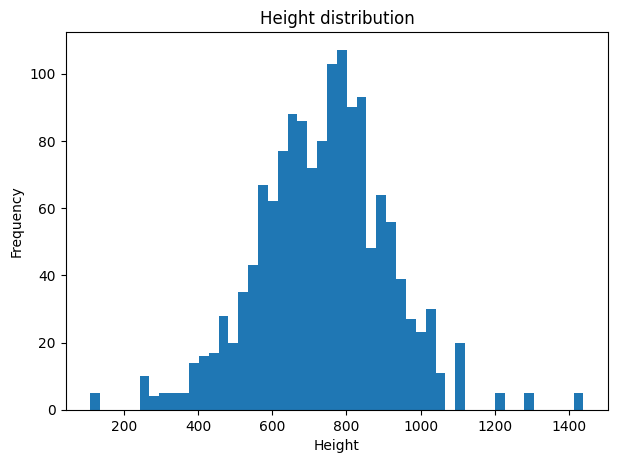

In [22]:
plot_distribution(df['height'], title='Height distribution', xlabel='Height')

In [23]:
# dropping the first column
df = df.iloc[:,1:]

In [24]:
# Identifying the skewness accross various features

skew_features=df.skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_features})
skewness

,Skew
var2,19.714832
var4,9.620877
var1,4.250353
shoulder,1.284166
left_arm,0.985269
torso,0.660947
left_shin2,0.379982
face,0.292856
right_arm,0.071311
height,0.006838


In [25]:
# log transformations on highly skewed features
cols = ['var2', 'var1']

for col in cols:
    df[col] = np.log(df[col])
df.skew()

height        0.006838
face          0.292856
torso         0.660947
left_shin    -0.453436
left_shin2    0.379982
right_shin   -0.429587
shoulder      1.284166
left_arm      0.985269
right_arm     0.071311
var1         -0.279960
var2          1.433623
var3         -0.433531
var4          9.620877
dtype: float64

In [27]:
# Splitting into target y and feature matrix X
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [28]:
# Splitting the dataset to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)

print("Shape of X train set:",X_train.shape)
print("Shape of X test set:",X_test.shape)
print("Shape of y train set:",y_train.shape)
print("Shape of y test set:",y_test.shape)

Shape of X train set: (1172, 12)
Shape of X test set: (293, 12)
Shape of y train set: (1172,)
Shape of y test set: (293,)


In [ ]:
# Visualizing the prediction error for the linear model
visualizer = PredictionError(lr_model)
visualizer.fit(X_train_scaled, y_train)  
visualizer.score(X_test_scaled, y_test)  
visualizer.poof()

In [ ]:
# Plotting the residual plot for the linear model
visualizer = ResidualsPlot(lr_model)
visualizer.fit(X_train_scaled, y_train)  
visualizer.score(X_test_scaled, y_test)  
visualizer.poof()